In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = 'I waited _ Rachit Juyal.wav.wav'  # Make sure to update this path
audio, sample_rate = librosa.load(file_path, sr=None)

# Calculate the duration of the audio in seconds
duration = len(audio) / sample_rate

# Display basic information about the audio
print("Basic Audio Information:")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {len(audio)}")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Channels: 1 (Mono)")





Basic Audio Information:
Sample Rate: 44100 Hz
Number of Samples: 2647989
Duration: 60.05 seconds
Number of Channels: 1 (Mono)


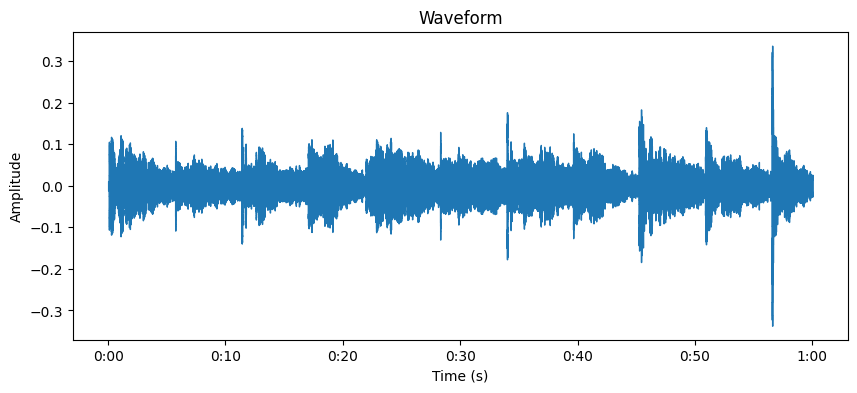

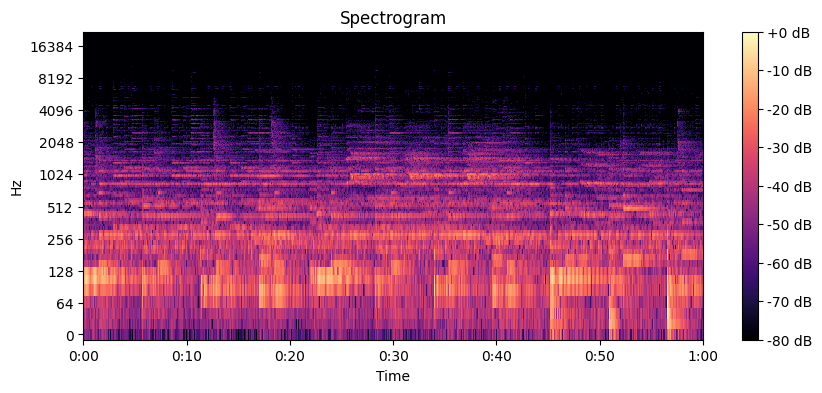

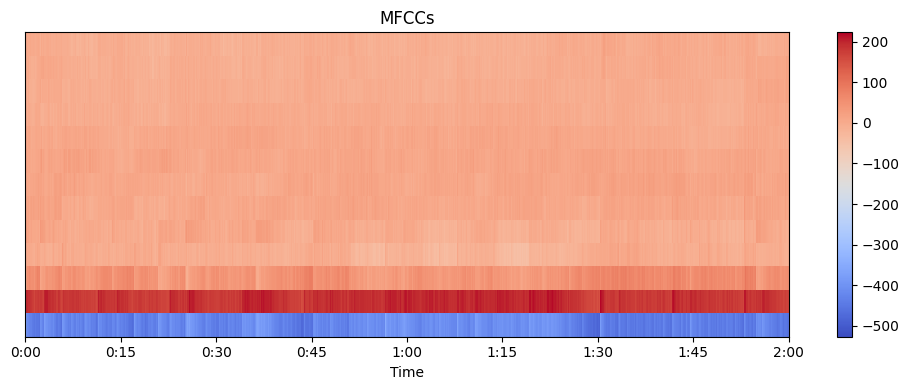

In [4]:
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Create a spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# Extract and display MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

In [5]:
import librosa.effects

# Segmenting the audio based on silence
non_silent_intervals = librosa.effects.split(audio, top_db=30)  # Change top_db as needed


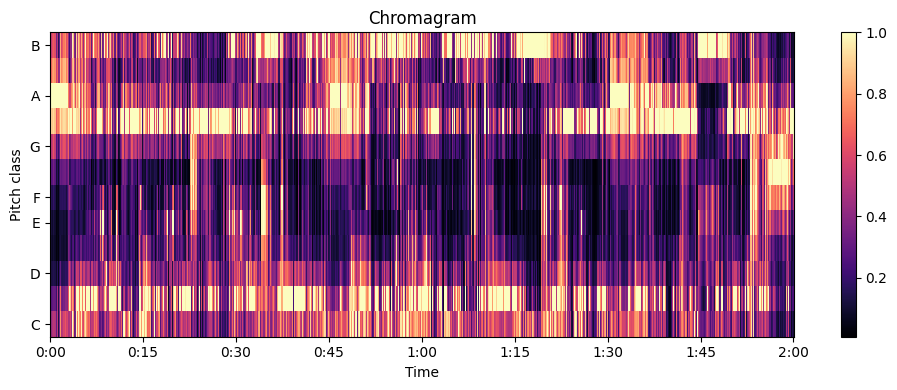

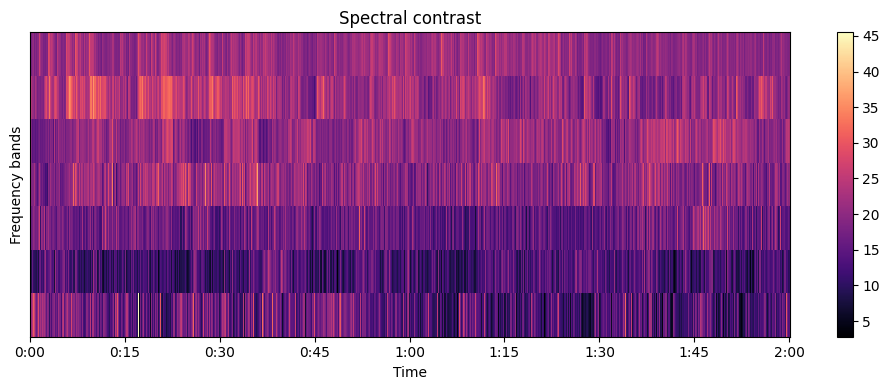

In [6]:
# Extracting Chroma feature
chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# Extracting Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extracting MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)

# Transposing the MFCCs to have the proper shape (n_samples, n_features)
mfccs = mfccs.T

# Standardizing the features
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(mfccs_scaled)

# You can now analyze the 'labels' to see how the audio frames were clustered


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


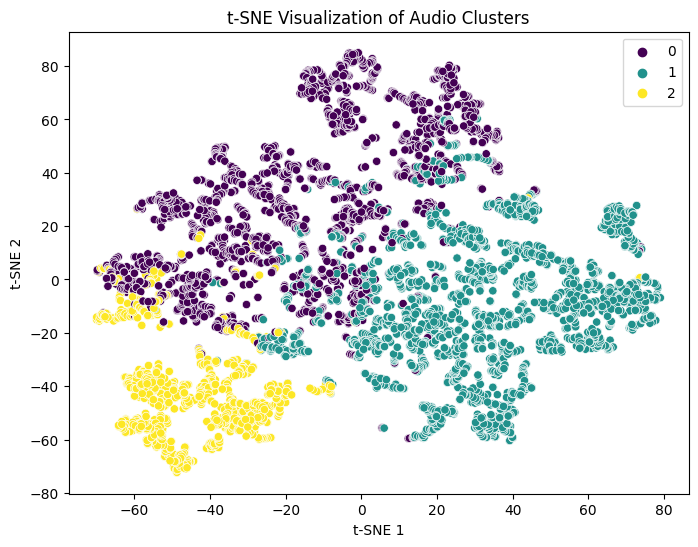

In [8]:
import seaborn as sns

# Visualizing the Clusters using t-SNE for dimensionality reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
mfccs_tsne = tsne.fit_transform(mfccs_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mfccs_tsne[:, 0], y=mfccs_tsne[:, 1], hue=labels, palette='viridis')
plt.title('t-SNE Visualization of Audio Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mfccs_scaled, labels, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       412
           1       0.97      0.97      0.97       436
           2       0.98      0.95      0.96       187

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



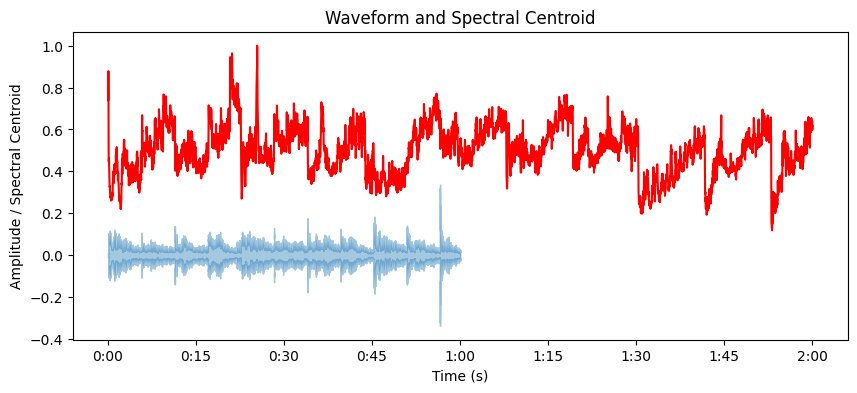

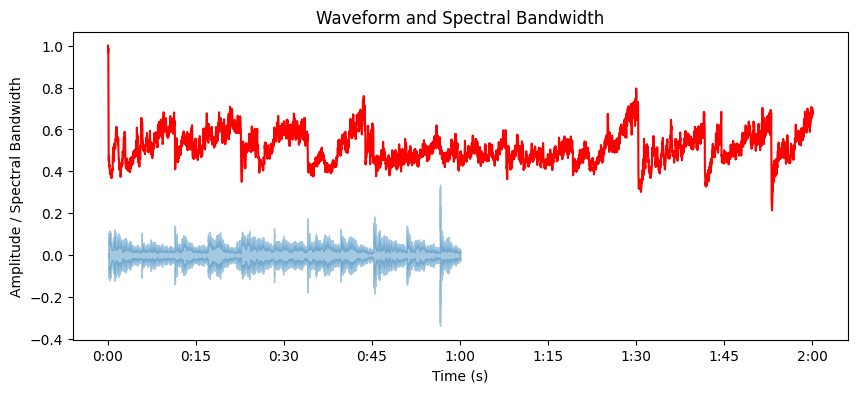

In [13]:
# a) Spectral Features
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate)[0]

# b) Rhythm Features
tempo, _ = librosa.beat.beat_track(y=audio, sr=sample_rate)

# c) Tonnetz
tonnetz = librosa.feature.tonnetz(y=audio, sr=sample_rate)

# d) Zero-Crossing Rate
zero_crossings = librosa.zero_crossings(audio, pad=False)
zero_crossing_rate = sum(zero_crossings) / len(audio)

def normalize(x, axis=0):
    return librosa.util.normalize(x, axis=axis)

# Visualizing Spectral Centroid
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate, alpha=0.4)
plt.plot(librosa.times_like(spectral_centroids), normalize(spectral_centroids), color='r')
plt.title('Waveform and Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Centroid')
plt.show()

# Visualizing Spectral Bandwidth
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate, alpha=0.4)
plt.plot(librosa.times_like(spectral_bandwidth), normalize(spectral_bandwidth), color='r')
plt.title('Waveform and Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Bandwidth')
plt.show()


In [15]:
import librosa
import numpy as np
import pandas as pd

# Load the audio file
file_path = 'I waited _ Rachit Juyal.wav.wav'  # Make sure to update this path
audio, sample_rate = librosa.load(file_path, sr=None)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Transpose the result to have the correct shape (n_samples, n_features)
mfccs = mfccs.T

# Create a DataFrame (if needed for AutoML platform)
data = pd.DataFrame(mfccs)
data['label'] = labels

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the data to CSV files (if needed by the AutoML platform)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [16]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=898ef7ce9da491b42aff327d08ed1daf3536d457193291c9e3388e7f23e9341b
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [17]:
import h2o
h2o.init()
hf = h2o.H2OFrame(data)
train, test = hf.split_frame(ratios=[0.8], seed=42)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps65bey27
  JVM stdout: /tmp/tmps65bey27/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps65bey27/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_ocao2c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [19]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed=42)
aml.train(y='label', training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/20
# GBM base models (used / total),2/7
# XGBoost base models (used / total),5/6
# DeepLearning base models (used / total),4/4
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [20]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows (instead of default 10 rows)

performance = aml.leader.model_performance(test)
print(performance)


model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231025_53013     0.27856   0.0775955  0.121546  0.165076                 0.0775955
StackedEnsemble_BestOfFamily_1_AutoML_1_20231025_53013  0.279349  0.0780359  0.12089   0.165867                 0.0780359
DeepLearning_grid_3_AutoML_1_20231025_53013_model_1     0.289791  0.0839787  0.119101  0.171309                 0.0839787
DeepLearning_1_AutoML_1_20231025_53013                  0.303993  0.0924119  0.149165  0.179419                 0.0924119
DeepLearning_grid_2_AutoML_1_20231025_53013_model_1     0.30834   0.0950735  0.159749  0.17901                  0.0950735
XRT_1_AutoML_1_20231025_53013                           0.308428  0.0951279  0.150947  0.188074                 0.0951279
GBM_3_AutoML_1_20231025_53013                           0.309077  0.0955286  0.158749  0.187103                 0.0955286
GBM_4_AutoML_1_20231025_

In [21]:
predictions = aml.predict(test)
print(predictions)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
0.0238497
0.0657947
0.812243
0.78272
0.93248
0.996851
0.998635
0.860302
1.03765
1.00922
[1020 rows x 1 column]

